In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import fnmatch
import sys
import h5py
import pickle
import pandas as pd
from typing import Dict, List, Any, Tuple
from tqdm import tqdm


from scipy.spatial import distance

import warnings # highly illegal move to make pandas compliant
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import sys
sys.path.append('../code/utils')  # Add the utils directory to the Python path

import utils_data, utils_spikes, utils_events

# Let's see if the network is doing anything ? 

In [3]:
chosen_chip_id = 11614
chosen_chip_session = 0 # session 1 and 3 are rest - 0 and 2 are game

# Loading some data 

In [4]:
data_path = '../data/cortical_labs_data/'

full_data = utils_data.read_maxwell_h5(data_path)

data = utils_data.Get_channel_spiketimes(full_data)
data['session'] = data['session'].map(str)
data['id'] = data[['chip_id', 'session', 'date']].agg('-'.join, axis=1)
data["session"] = pd.to_numeric(data["session"])

data_rest = data[data['session']%2 == 1]
data_act = data[data['session']%2 == 0]
data_act = data_act.reset_index()
data_rest = data_rest.reset_index()

Loading data...:   0%|          | 0/29 [00:00<?, ?it/s]

Loading data...: 100%|██████████| 29/29 [00:01<00:00, 22.64it/s]


In [5]:
subset = data[(data['chip_id'] == str(chosen_chip_id)) & (data['session'] == chosen_chip_session)]
subset

,chip_id,session,date,spike_times,x_coordinates,y_coordinates,id
0,11614,0,2021-06-02,"{'channel_0': [2539, 8394, 26321, 39817, 58995...","{'channel_0': 1365.0, 'channel_1': 3237.5, 'ch...","{'channel_0': 665.0, 'channel_1': 1767.5, 'cha...",11614-0-2021-06-02


# Loading some events

In [6]:
filename = utils_events. find_file('../data/cortical_labs_data/', str(chosen_chip_id), str(chosen_chip_session))
if filename is None:
    print('File not found.')
else:
    print('Found file:', filename)
events = utils_events.load_event_txt(filename)

Found file: 11614.2021-06-02.0.events.txt
Stimulation mode: full game


In [7]:
# Now let's make a nice raster plot
events_hit = [event for event in events if event['event'] == 'ball return']
events_fail = [event for event in events if event['event'] == 'ball missed']
events_start = [event for event in events if event['event'] == 'motor layout: 0']

# Linking the two

In [8]:
spike_times = subset['spike_times'].iloc[0]

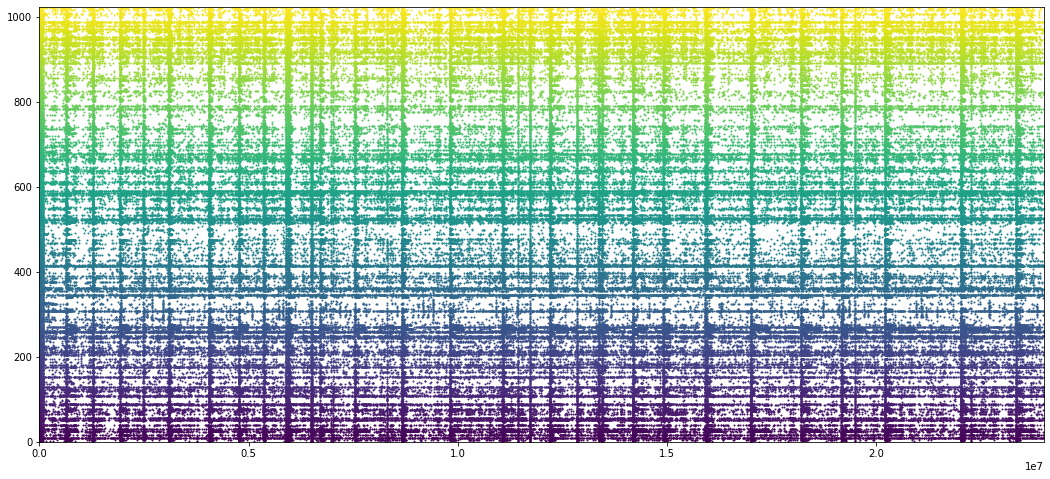

In [9]:
fig, ax = plt.subplots(figsize = (18,8))

cmap = plt.cm.viridis(np.linspace(0,1,len(spike_times.items())))
for key, value in spike_times.items() : 
    ax.scatter(value, np.ones_like(value)*int(key.split('_')[1]),
            s = 1, color = cmap[int(key.split('_')[1])])
    
ax.set_ylim(0, len(spike_times.items()))
ax.set_xlim(0, 2.4e7)

plt.show()

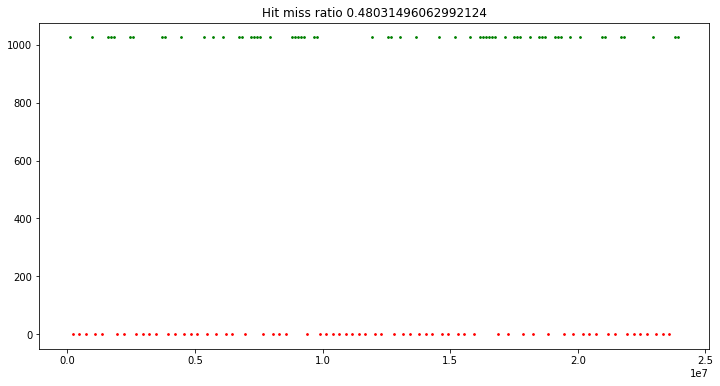

In [10]:
stamps_hits = [x['norm_timestamp'] for x in events_hit]
stamps_miss = [x['norm_timestamp'] for x in events_fail]

fig, ax = plt.subplots(figsize = (12,6))

ax.scatter(stamps_hits, y = np.ones_like(stamps_hits)*len(spike_times.items())+1, s = 3, color = 'green')
ax.scatter(stamps_miss, y = np.zeros_like(stamps_miss)*len(spike_times.items())+1, s = 3, color = 'red')

plt.title('Hit miss ratio %s' % (len(stamps_hits)/(len(stamps_hits)+len(stamps_miss))))
plt.show()

# Comparing to another session

Loading data...: 100%|██████████| 29/29 [00:01<00:00, 24.86it/s]


Found file: 11614.2021-06-02.2.events.txt
Stimulation mode: full game


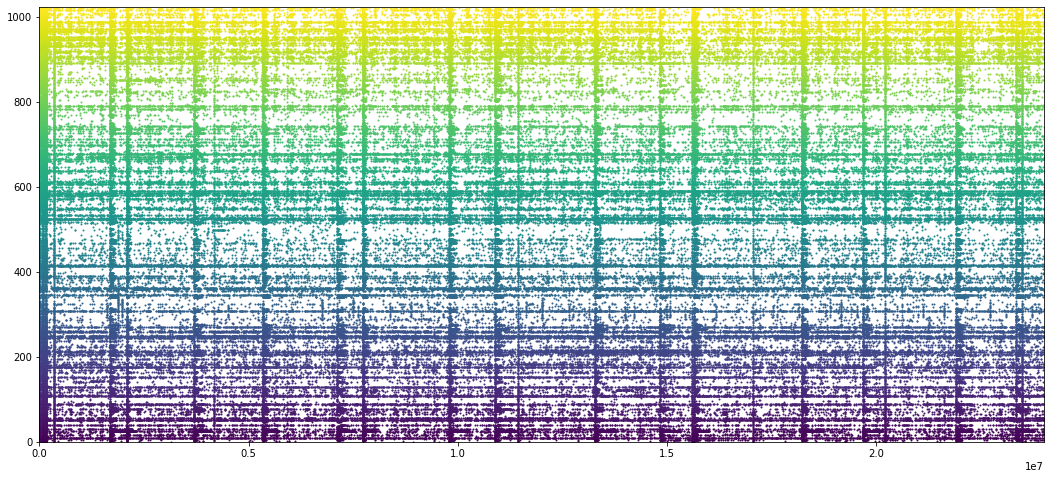

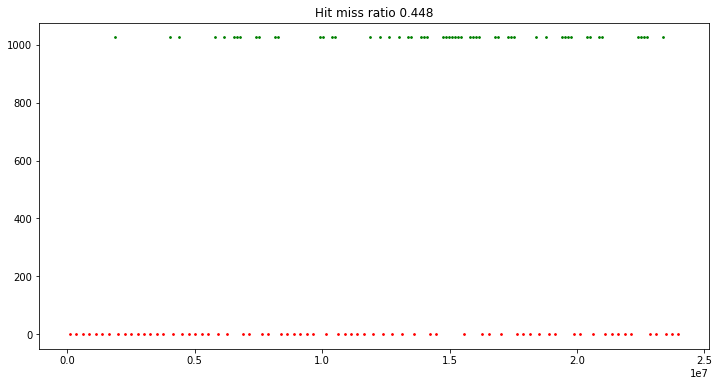

In [11]:
chosen_chip_id = 11614
chosen_chip_session = 2 # session 1 and 3 are rest - 0 and 2 are game

# Loading data
data_path = '../data/cortical_labs_data/'

full_data = utils_data.read_maxwell_h5(data_path)

data = utils_data.Get_channel_spiketimes(full_data)
data['session'] = data['session'].map(str)
data['id'] = data[['chip_id', 'session', 'date']].agg('-'.join, axis=1)
data["session"] = pd.to_numeric(data["session"])

data_rest = data[data['session']%2 == 1]
data_act = data[data['session']%2 == 0]
data_act = data_act.reset_index()
data_rest = data_rest.reset_index()

subset = data[(data['chip_id'] == str(chosen_chip_id)) & (data['session'] == chosen_chip_session)]
subset

# Loading events
filename = utils_events. find_file('../data/cortical_labs_data/', str(chosen_chip_id), str(chosen_chip_session))
if filename is None:
    print('File not found.')
else:
    print('Found file:', filename)
events = utils_events.load_event_txt(filename)

# Now let's make a nice raster plot
events_hit = [event for event in events if event['event'] == 'ball return']
events_fail = [event for event in events if event['event'] == 'ball missed']
events_start = [event for event in events if event['event'] == 'motor layout: 0']

# Selecting spike times 
spike_times = subset['spike_times'].iloc[0]

# Raster 
fig, ax = plt.subplots(figsize = (18,8))

cmap = plt.cm.viridis(np.linspace(0,1,len(spike_times.items())))
for key, value in spike_times.items() : 
    ax.scatter(value, np.ones_like(value)*int(key.split('_')[1]),
            s = 1, color = cmap[int(key.split('_')[1])])
    
ax.set_ylim(0, len(spike_times.items()))
ax.set_xlim(0, 2.4e7)

plt.show()

# Hit miss

stamps_hits = [x['norm_timestamp'] for x in events_hit]
stamps_miss = [x['norm_timestamp'] for x in events_fail]

fig, ax = plt.subplots(figsize = (12,6))

ax.scatter(stamps_hits, y = np.ones_like(stamps_hits)*len(spike_times.items())+1, s = 3, color = 'green')
ax.scatter(stamps_miss, y = np.zeros_like(stamps_miss)*len(spike_times.items())+1, s = 3, color = 'red')

plt.title('Hit miss ratio %s' % (len(stamps_hits)/(len(stamps_hits)+len(stamps_miss))))
plt.show()

# Computing only metrics - Hit or Miss

In [56]:
ids = [11614, 9501]
sessions = [0, 2]

# Loading data
data_path = '../data/cortical_labs_data/'

full_data = utils_data.read_maxwell_h5(data_path)

data = utils_data.Get_channel_spiketimes(full_data)
data['session'] = data['session'].map(str)
data['id'] = data[['chip_id', 'session', 'date']].agg('-'.join, axis=1)
data["session"] = pd.to_numeric(data["session"])

data_rest = data[data['session']%2 == 1]
data_act = data[data['session']%2 == 0]
data_act = data_act.reset_index()
data_rest = data_rest.reset_index()

for i_id, id in enumerate(ids) :
    print('DISH # %s ' % id)
    metrics = []
    for i_session, session in enumerate(sessions) :
        print('SESSION = %s' % session)
        chosen_chip_id = id
        chosen_chip_session = session 
        subset = data[(data['chip_id'] == str(chosen_chip_id)) & (data['session'] == chosen_chip_session)]

        # Loading events --------------------
        filename = utils_events. find_file('../data/cortical_labs_data/', str(chosen_chip_id), str(chosen_chip_session))
        if filename is None:
            print('File not found.')
        else:
            print('Found file:', filename)
        events = utils_events.load_event_txt(filename)

        # Now let's make a nice raster plot --------------------
        events_hit = [event for event in events if event['event'] == 'ball return']
        events_fail = [event for event in events if event['event'] == 'ball missed']
        events_start = [event for event in events if event['event'] == 'motor layout: 0']
        # Selecting spike times  --------------------
        spike_times = subset['spike_times'].iloc[0]

        # Hit miss ratio --------------------
        hit_miss_ratio = len(events_hit)/(len(events_hit)+len(events_fail))
        
        # Aces --------------------
        events_without_bounce = [event for event in events if event['event'] != 'ball bounce'] # this is not useful here
        game_started_next_hit, game_started_next_miss = [], []
        for i in range(len(events_without_bounce) - 1): # iterate up to the second-to-last element
            if events_without_bounce[i]['event'] == 'motor layout: 0':
                next_event = events_without_bounce[i+1]
                if next_event['event'] == 'ball missed' :
                    game_started_next_miss.append(next_event)
                elif next_event['event'] == 'ball return' :
                    game_started_next_hit.append(next_event)
                
        aces = len(game_started_next_miss)
        successfull_init_returns = len(game_started_next_hit)
        ratio_aces = aces/(aces+successfull_init_returns)
        
        # Rally Length --------------------
        events_without_bounce_init= [event for event in events_without_bounce if event['event'] != 'motor layout: 0'] # we don't need inits
        last_event = None
        count = 0
        counts = []
        for event in events_without_bounce_init:
            if event['event'] == 'ball return':
                if last_event == 'ball return':
                    count += 1
                else:
                    count = 1  # reset count to 1 if the last event was not 'ball return'
            elif event['event'] == 'ball missed':
                if last_event == 'ball return':
                    counts.append(count)
                count = 0  # reset count to 0 if 'ball missed'
            last_event = event['event']
        # append last count if the last event was 'ball return'
        if last_event == 'ball return':
            counts.append(count)
            
        rally_lengths = counts # aliasing
        avg_rally_length = np.mean(rally_lengths)
        percent_long_rally = len([x for x in rally_lengths if x > 3])/len(rally_lengths)
        
        print(' -- Metrics -- ')
        print('Hit miss ratio %s' % hit_miss_ratio)
        print('Ace ratio %s' % ratio_aces)
        print('Average rally length %s' % avg_rally_length)
        print('Long rally ratio %s' % percent_long_rally)
        metrics.append({'hit_miss_ratio' : hit_miss_ratio, 'ratio_aces' : ratio_aces,
                        'avg_rally_length' : avg_rally_length, 'percent_long_rally' : percent_long_rally})
        print('-')
        
    print('-- Delta Metrics --')
    print('Delta hit miss ratio %s' % (metrics[1]['hit_miss_ratio'] - metrics[0]['hit_miss_ratio']))
    print('Delta ace ratio %s' % (metrics[1]['ratio_aces'] - metrics[0]['ratio_aces']))
    print('Delta average rally length %s' % (metrics[1]['avg_rally_length'] - metrics[0]['avg_rally_length']))
    print('Delta long rally ratio %s' % (metrics[1]['percent_long_rally'] - metrics[0]['percent_long_rally']))
    print('-------------------')

Loading data...: 100%|██████████| 29/29 [00:01<00:00, 22.27it/s]


DISH # 11614 
SESSION = 0
Found file: 11614.2021-06-02.0.events.txt
Stimulation mode: full game
 -- Metrics -- 
Hit miss ratio 0.48031496062992124
Ace ratio 0.5151515151515151
Average rally length 1.8484848484848484
Long rally ratio 0.09090909090909091
-
SESSION = 2
Found file: 11614.2021-06-02.2.events.txt
Stimulation mode: full game
 -- Metrics -- 
Hit miss ratio 0.448
Ace ratio 0.6029411764705882
Average rally length 2.074074074074074
Long rally ratio 0.14814814814814814
-
-- Delta Metrics --
Delta hit miss ratio -0.03231496062992123
Delta ace ratio 0.08778966131907306
Delta average rally length 0.22558922558922556
Delta long rally ratio 0.05723905723905723
-------------------
DISH # 9501 
SESSION = 0
Found file: 9501.2021-06-01.0.events.txt
Stimulation mode: full game
 -- Metrics -- 
Hit miss ratio 0.456
Ace ratio 0.5074626865671642
Average rally length 1.6764705882352942
Long rally ratio 0.058823529411764705
-
SESSION = 2
Found file: 9501.2021-06-01.2.events.txt
Stimulation mode: 